In [160]:
import numpy as np
import pandas as pd
import plotly.express as px

#### Stiahnuté dáta 10.10.2024 od 9:00 do 13:00
##### Diely neboli demontované

In [161]:
#url='https://raw.githubusercontent.com/fulekset/voila-dashboard/07f95403e7b21fbbdfd16824f7473034f9fdcf09/TESLA.xlsx'
url='https://raw.githubusercontent.com/fulekset/voila-dashboard/af8c8f00c06bf73629252e511c76c393c99aa8d9/DATA_PY1.xlsx'
df=pd.read_excel(url, sheet_name="101024_9-13", engine="openpyxl")

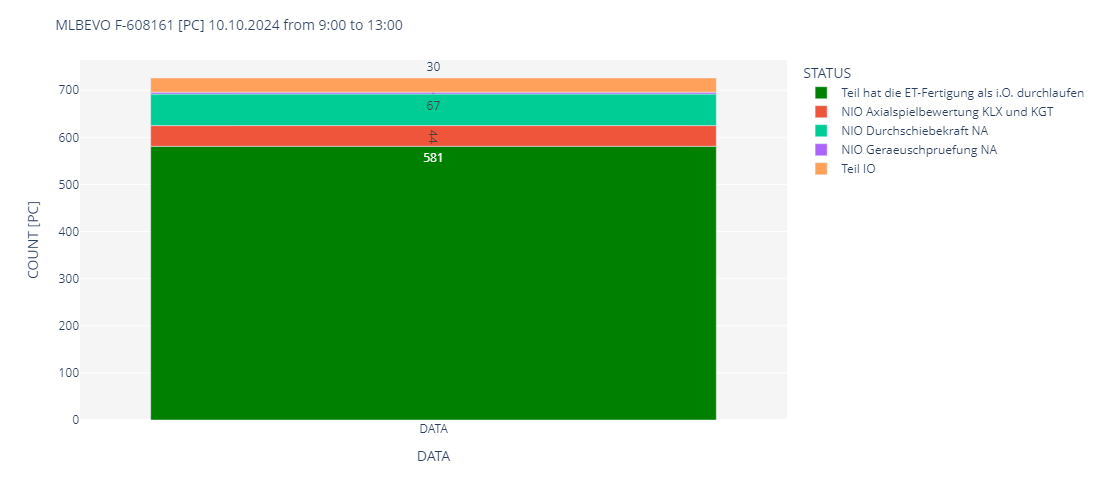

In [162]:
fig=px.bar(df, x='DATA', y='COUNT [PC]',color='STATUS',color_discrete_map={"Teil hat die ET-Fertigung als i.O. durchlaufen":"green"},
            text_auto=True, height=500, width=800)
fig.update_layout(title=f"MLBEVO F-608161 [PC] 10.10.2024 from 9:00 to 13:00", title_font_size=14)
fig.update_layout(plot_bgcolor="whitesmoke")
fig.show()

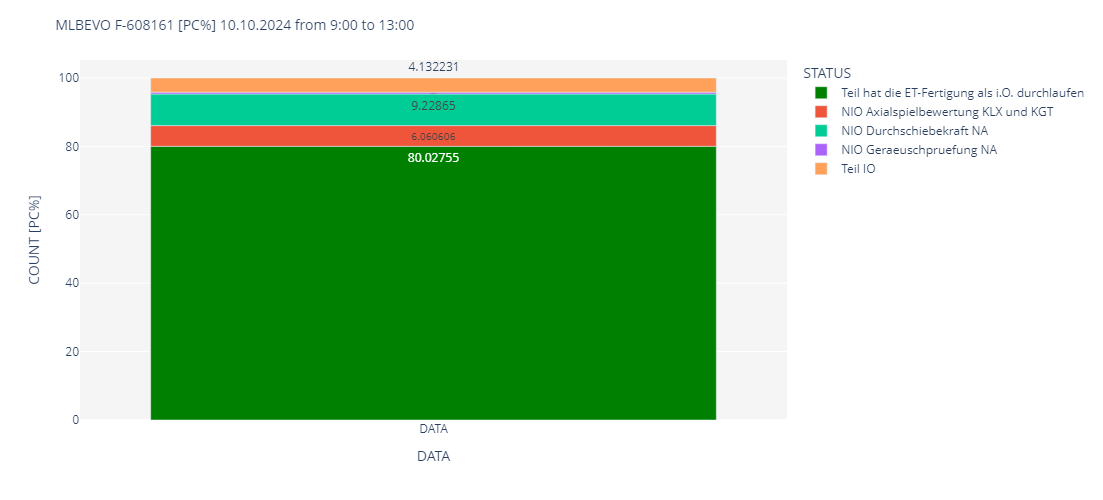

In [163]:
fig=px.bar(df, x='DATA', y='COUNT [PC%]',color='STATUS',color_discrete_map={"Teil hat die ET-Fertigung als i.O. durchlaufen":"green"},
            text_auto=True, height=500, width=800)
fig.update_layout(title=f"MLBEVO F-608161 [PC%] 10.10.2024 from 9:00 to 13:00", title_font_size=14)
fig.update_layout(plot_bgcolor="whitesmoke")
fig.show()

In [164]:
df_axial=pd.read_excel(url, sheet_name="AXIAL_9-13", engine="openpyxl")

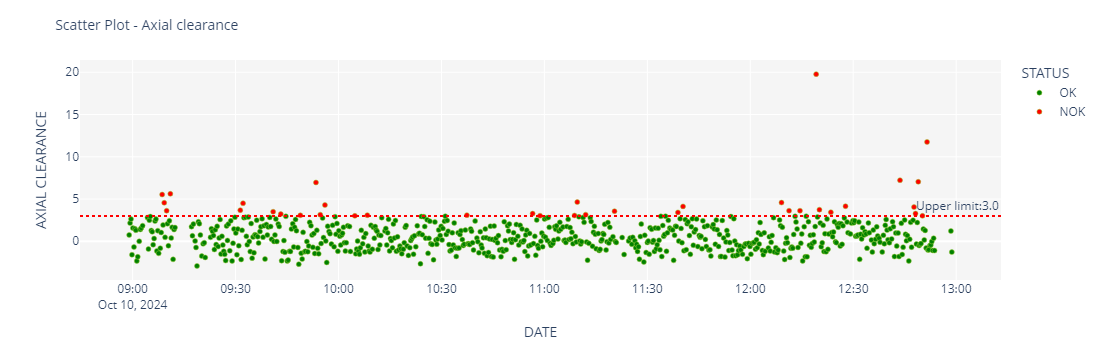

In [165]:
fig=px.scatter(df_axial, x="DATE", y="AXIAL CLEARANCE", color="STATUS", color_discrete_map={"NOK": "red","OK": "green"})
fig.add_hline(y=3.0, line_dash="dot", line_color="red",annotation_text=f'Upper limit:3.0')
fig.update_traces(marker=dict(size=5,line=dict(width=0.5,color='yellowgreen')),selector=dict(mode='markers'))
fig.update_layout(plot_bgcolor='whitesmoke')
fig.update_layout(title=f"Scatter Plot - Axial clearance", title_font_size=14)
fig.show()

#### Stiahnutá VZ 3416766 pre F-608161

In [166]:
df=pd.read_excel(url, sheet_name="3416766", engine="openpyxl")

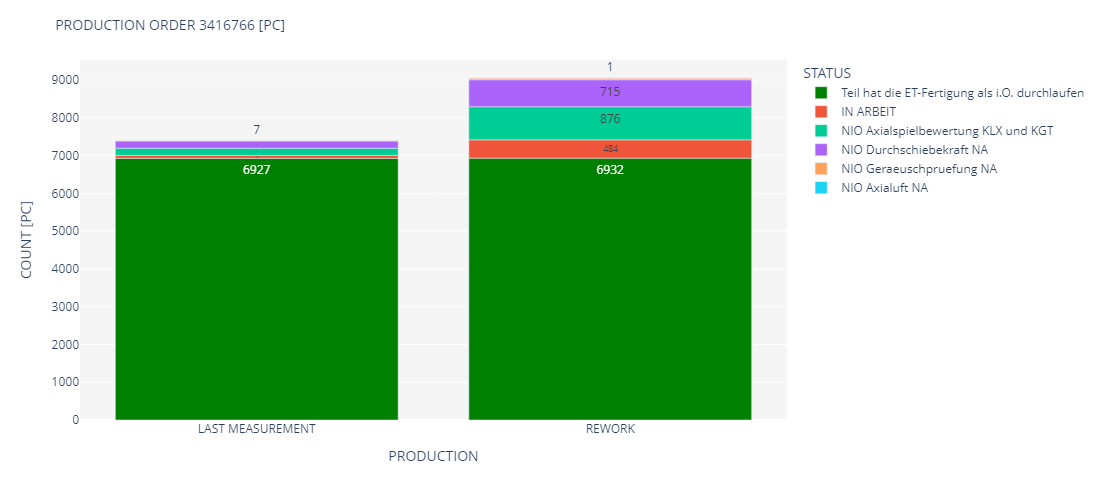

In [167]:
fig=px.bar(df, x='PRODUCTION', y='COUNT [PC]',color='STATUS',color_discrete_map={"Teil hat die ET-Fertigung als i.O. durchlaufen":"green"},
            text_auto=True, height=500, width=800)
fig.update_layout(title=f"PRODUCTION ORDER 3416766 [PC]", title_font_size=14)
fig.update_layout(plot_bgcolor="whitesmoke")
fig.show()

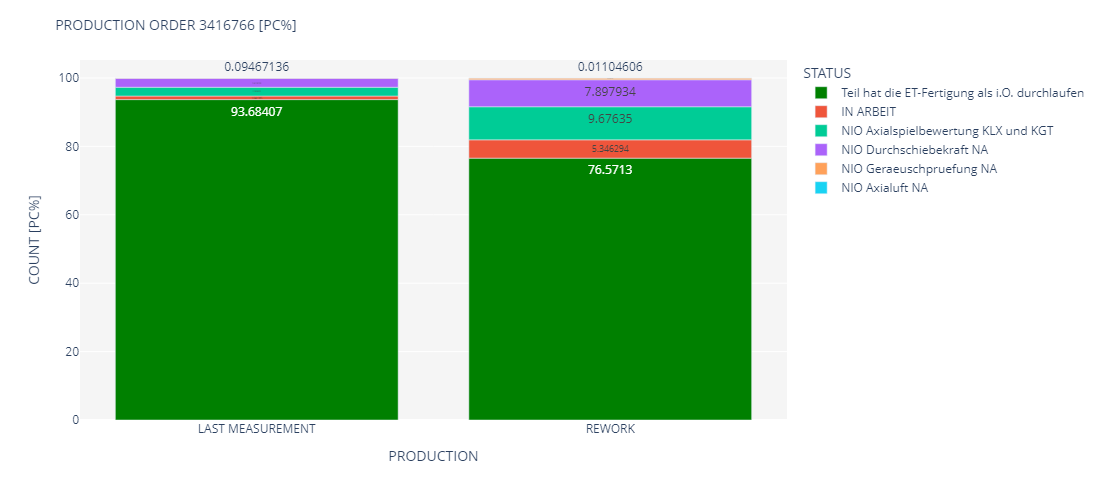

In [168]:
fig=px.bar(df, x='PRODUCTION', y='COUNT [PC%]',color='STATUS',color_discrete_map={"Teil hat die ET-Fertigung als i.O. durchlaufen":"green"},
            text_auto=True, height=500, width=800)
fig.update_layout(title=f"PRODUCTION ORDER 3416766 [PC%]", title_font_size=14)
fig.update_layout(plot_bgcolor="whitesmoke")
fig.show()

## REWORK
#### Stiahnutá VZ 3416766 pre F-608161 (po hodinách)

In [169]:
df_rework=pd.read_excel(url, sheet_name="rework", engine="openpyxl")
df_rework['Date_hour'] = df_rework['Posledné spracovanie'].dt.strftime('%Y-%m-%d %H:00')
df_group_rework=df_rework.groupby(["Štádium spracovania ","Date_hour"]).count().reset_index().sort_values(by=["Date_hour"], ascending=True)
df_group_rework1=df_group_rework[["Štádium spracovania ","Date_hour","DMC "]]
df_group_rework1['COUNT'] = df_group_rework1.groupby("Date_hour")["DMC "].transform('sum')
df_group_rework1["PERCENTAGE"] = (df_group_rework1["DMC "] / df_group_rework1["COUNT"]) * 100
df_group_rework1["PERCENTAGE"] = df_group_rework1["PERCENTAGE"].round(2)

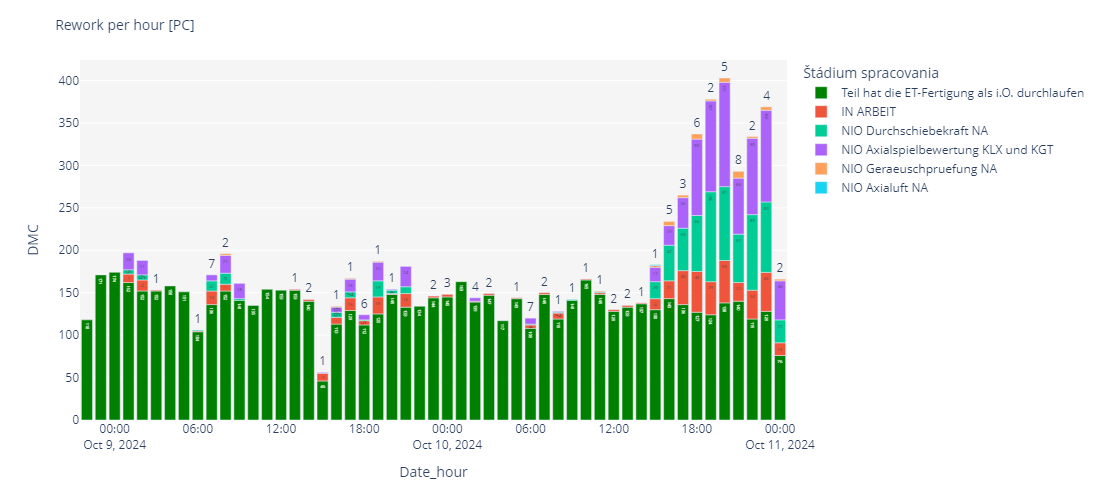

In [170]:
fig = px.bar(df_group_rework1, x='Date_hour', y='DMC ',color='Štádium spracovania ',color_discrete_map={"Teil hat die ET-Fertigung als i.O. durchlaufen":"green"},
            text_auto=True, height=500)
fig.update_layout(title=f"Rework per hour [PC]", title_font_size=14)
fig.update_layout(plot_bgcolor="whitesmoke")
fig.show()

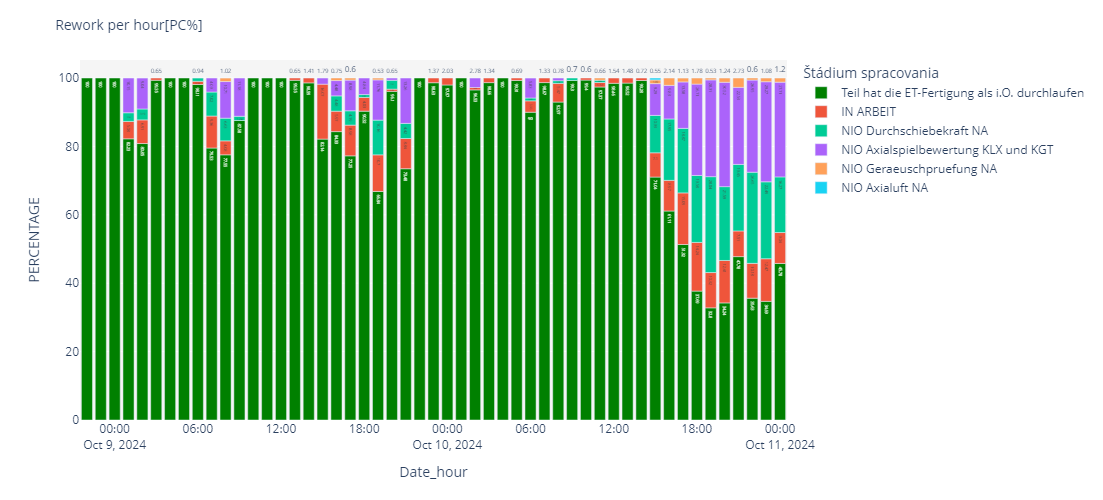

In [171]:
fig = px.bar(df_group_rework1, x='Date_hour', y='PERCENTAGE',color='Štádium spracovania ',color_discrete_map={"Teil hat die ET-Fertigung als i.O. durchlaufen":"green"},
            text_auto=True, height=500)
fig.update_layout(title=f"Rework per hour[PC%]", title_font_size=14)
fig.update_layout(plot_bgcolor="whitesmoke")
fig.show()

## LAST MEASUREMENT
#### Stiahnutá VZ 3416766 pre F-608161 (po hodinách)

In [172]:
df_last=pd.read_excel(url, sheet_name="last", engine="openpyxl")
df_last['Date_hour'] = df_last['Posledné spracovanie'].dt.strftime('%Y-%m-%d %H:00')
df_group_last=df_last.groupby(["Štádium spracovania ","Date_hour"]).count().reset_index().sort_values(by=["Date_hour"], ascending=True)
df_group_last1=df_group_last[["Štádium spracovania ","Date_hour","DMC "]]
df_group_last1['COUNT'] = df_group_last1.groupby("Date_hour")["DMC "].transform('sum')
df_group_last1["PERCENTAGE"] = (df_group_last1["DMC "] / df_group_last1["COUNT"]) * 100
df_group_last1["PERCENTAGE"] = df_group_last1["PERCENTAGE"].round(2)

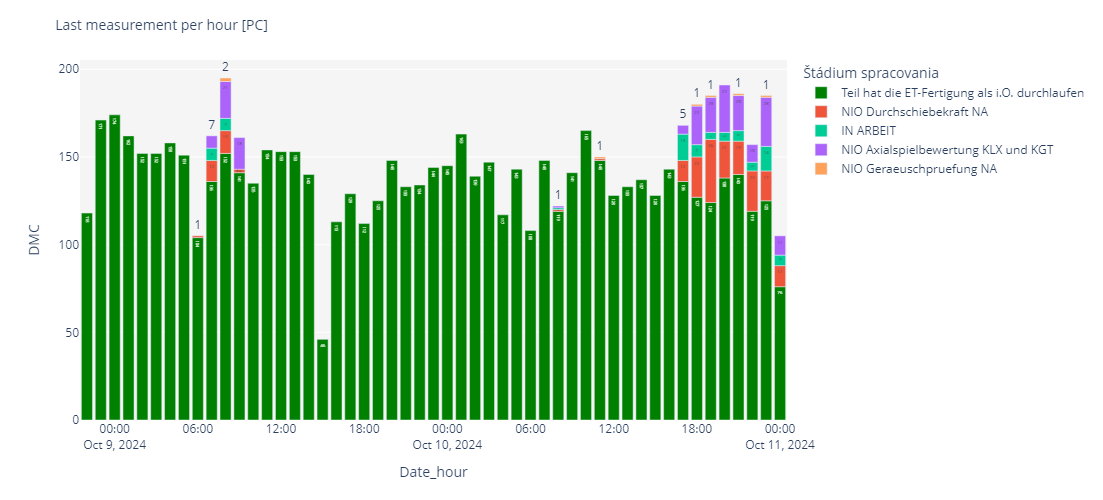

In [173]:
fig = px.bar(df_group_last1, x='Date_hour', y='DMC ',color='Štádium spracovania ',color_discrete_map={"Teil hat die ET-Fertigung als i.O. durchlaufen":"green"},
            text_auto=True, height=500)
fig.update_layout(title=f"Last measurement per hour [PC]", title_font_size=14)
fig.update_layout(plot_bgcolor="whitesmoke")
fig.show()

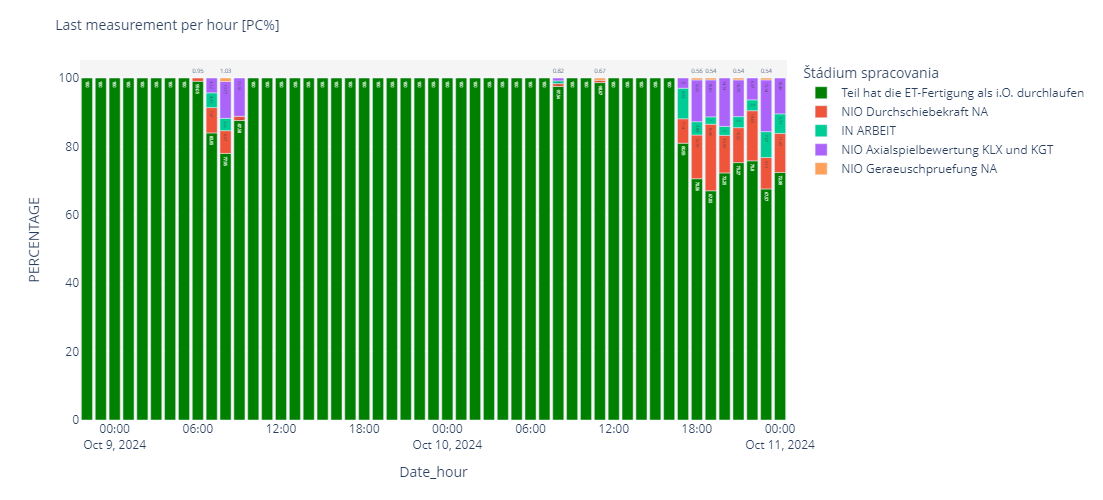

In [174]:
fig = px.bar(df_group_last1, x='Date_hour', y='PERCENTAGE',color='Štádium spracovania ',color_discrete_map={"Teil hat die ET-Fertigung als i.O. durchlaufen":"green"},
            text_auto=True, height=500)
fig.update_layout(title=f"Last measurement per hour [PC%]", title_font_size=14)
fig.update_layout(plot_bgcolor="whitesmoke")
fig.show()

#### AXIÁLNA VôĽA/VZ:3416766

In [175]:
df_vz=pd.read_excel(url, sheet_name="AXIAL_3416766", engine="openpyxl")
#df_vz["DATE"]=pd.to_datetime(df_vz["DATE"])
#df_vz

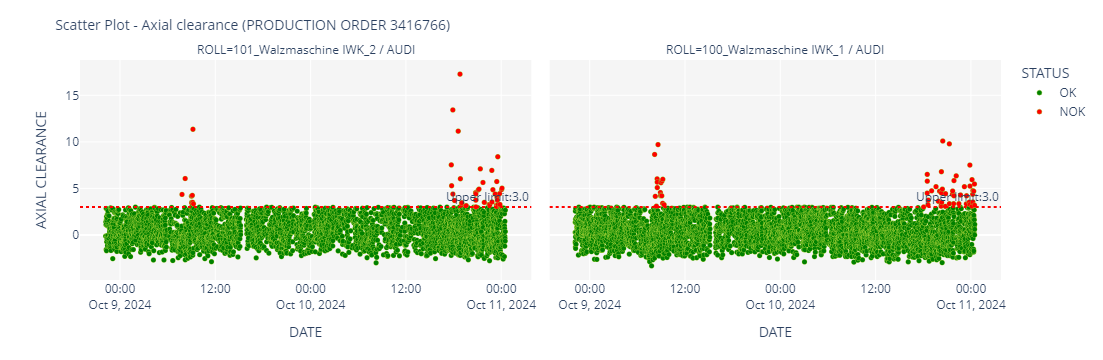

In [176]:
fig=px.scatter(df_vz, x="DATE", y="AXIAL CLEARANCE", color="STATUS", color_discrete_map={"NOK": "red","OK": "green"}, facet_col="ROLL")
fig.add_hline(y=3.0, line_dash="dot", line_color="red",annotation_text=f'Upper limit:3.0')
fig.update_traces(marker=dict(size=5,line=dict(width=0.4,color='yellowgreen')),selector=dict(mode='markers'))
fig.update_layout(plot_bgcolor='whitesmoke')
fig.update_layout(title=f"Scatter Plot - Axial clearance (PRODUCTION ORDER 3416766)", title_font_size=14)
fig.show()

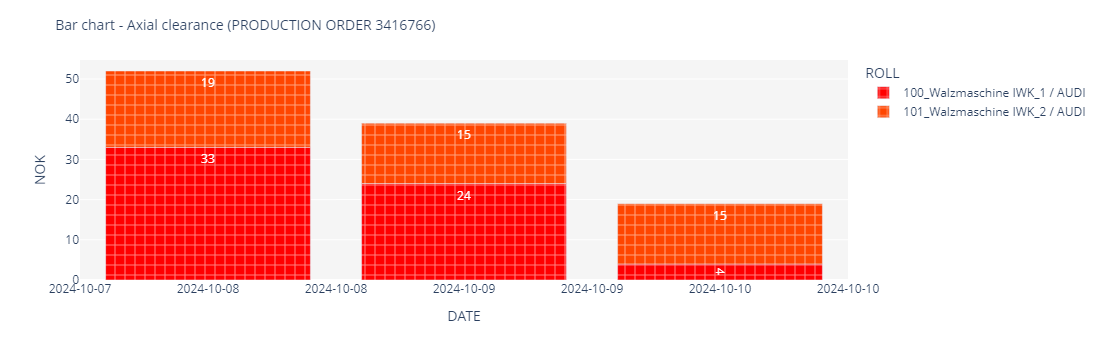

In [177]:
color_sequence = ['red', 'orangered']
df_nok=pd.read_excel(url, sheet_name="NOK", engine="openpyxl")
fig = px.bar(df_nok, x="DATE", y="NOK", color="ROLL", color_discrete_sequence=color_sequence, pattern_shape_sequence=["+"],text_auto=True)
fig.update_layout(
    xaxis=dict(tickformat="%Y-%m-%d"),  # Formát dátumu (rok-mesiac-deň)
    plot_bgcolor='whitesmoke',
    title="Bar chart - Axial clearance (PRODUCTION ORDER 3416766)",
    title_font_size=14)
fig.show()

#### UNI KGT BALIG - POROVNANIE 8.10.2024 A 10.10.2024
##### Nájdenie meraní UNI_KGT v dátumoch 8.10.2024 a 10.10.2024

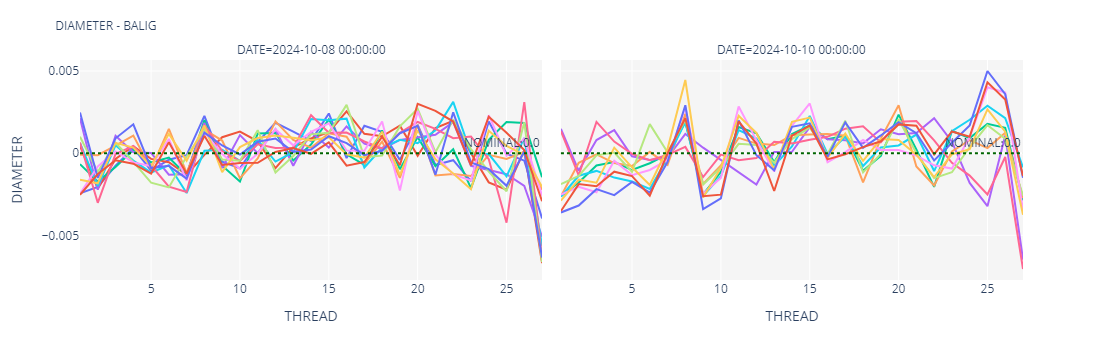

In [178]:
url_uni='https://raw.githubusercontent.com/fulekset/voila-dashboard/af8c8f00c06bf73629252e511c76c393c99aa8d9/DATA_UNI-KGT.xlsx'
uni=pd.read_excel(url_uni, sheet_name="UNI_KGT_BALIG", engine="openpyxl")
fig = px.line(uni, x='THREAD', y='DIAMETER', color="Zdroj.Názov", facet_col="DATE")
fig.add_hline(y=0.0, line_dash="dot", line_color="darkgreen",annotation_text=f'NOMINAL:0.0')
fig.update_layout(plot_bgcolor='whitesmoke',showlegend=False)
fig.update_layout(title=f"DIAMETER - BALIG", title_font_size=12)
fig.show()

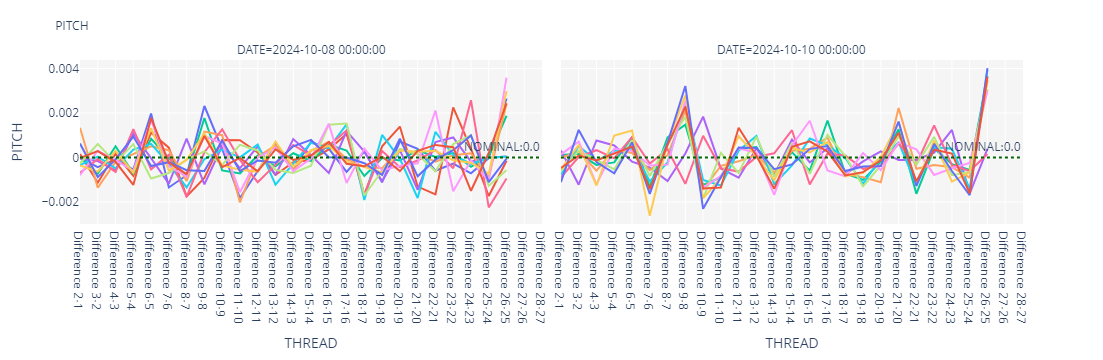

In [179]:
uni=pd.read_excel(url_uni, sheet_name="PITCH", engine="openpyxl")
uni['THREAD'] = uni['THREAD'].astype(str)
fig = px.line(uni, x='THREAD', y='PITCH', color="Zdroj.Názov", facet_col="DATE")
fig.add_hline(y=0.0, line_dash="dot", line_color="darkgreen",annotation_text=f'NOMINAL:0.0')
fig.update_layout(plot_bgcolor='whitesmoke',showlegend=False)
fig.update_layout(title=f"PITCH", title_font_size=12)
fig.show()

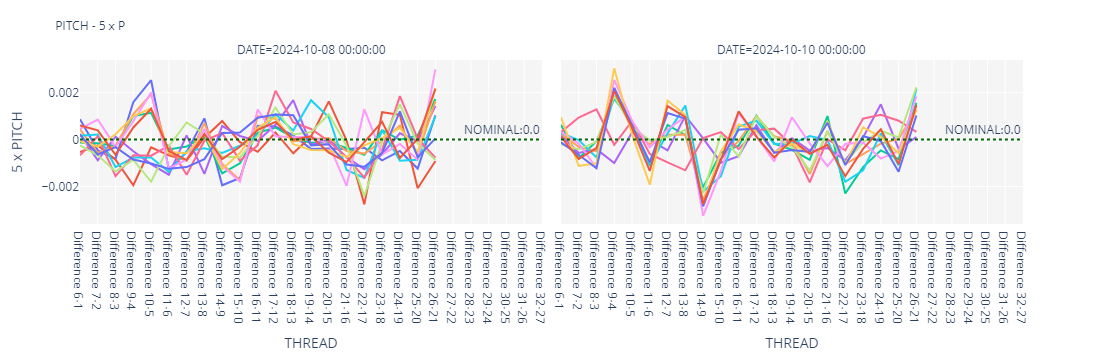

In [180]:
uni=pd.read_excel(url_uni, sheet_name="5 x PITCH", engine="openpyxl")
uni['THREAD'] = uni['THREAD'].astype(str)
fig = px.line(uni, x='THREAD', y='5 x PITCH', color="Zdroj.Názov", facet_col="DATE")
fig.add_hline(y=0.0, line_dash="dot", line_color="darkgreen",annotation_text=f'NOMINAL:0.0')
fig.update_layout(plot_bgcolor='whitesmoke',showlegend=False)
fig.update_layout(title=f"PITCH - 5 x P", title_font_size=12)
fig.show()

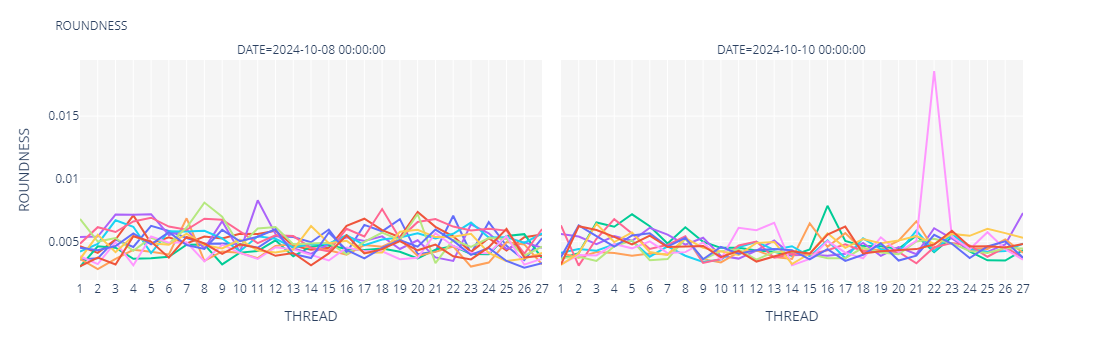

In [181]:
uni=pd.read_excel(url_uni, sheet_name="ROUNDNESS", engine="openpyxl")
uni['THREAD'] = uni['THREAD'].astype(str)
fig = px.line(uni, x='THREAD', y='ROUNDNESS', color="Zdroj.Názov", facet_col="DATE")
fig.update_layout(plot_bgcolor='whitesmoke',showlegend=False)
fig.update_layout(title=f"ROUNDNESS", title_font_size=12)
fig.show()